In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import Counter
from wordcloud import WordCloud 

In [2]:
steam = pd.read_csv('C:\\Users\\Lenovo IdeaPad JQ\\Dev\\steam-sentiment\\data\\steam-data\\dataset.csv')
steam.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [5]:
type(steam['review_text'].head(5))

pandas.core.series.Series

In [14]:
# drop the duplicates
steam = steam.drop_duplicates(keep='first')

steam.groupby("app_name", as_index=False)["review_score"].count().rename(columns={'review_score':'Review Count'}).sort_values(by=["Review Count"], ascending=False).head(10)

,app_name,Review Count
7776,Terraria,78276
5579,PAYDAY 2,63577
2349,Dota 2,50190
8630,Undertale,48512
8896,Warframe,44970
6446,Rocket League,39035
4398,Left 4 Dead 2,35406
3409,Grand Theft Auto V,30213
576,Arma 3,29854
957,BioShock Infinite,29770


In [65]:
steam.groupby("app_name", as_index=False)["review_score"].count().rename(columns={'review_score':'Review Count'}).sort_values(by=["Review Count"], ascending=True).head(10)

,app_name,Review Count
3843,The Next World,51
867,Crystal Catacombs,51
2261,Magnifico,51
1466,Fly O'Clock,51
3597,Swiftly,51
235,Angelica Weaver: Catch Me When You Can - Colle...,51
795,Conflict: Denied Ops,51
3731,The Counting Kingdom,51
677,Ceville,51
4211,Vortex: The Gateway,51


In [15]:
# convert review texts to string 
steam["review_text"] = steam["review_text"].astype(str)

In [18]:
# define the word cloud function
def wordcloud_generator(data, title=None):
    
    # Keep top 1000 most frequent words
    most_freq = Counter(data).most_common(1000) 
    text = ' '.join([x[0] for x in most_freq])
    
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10,
                          collocations=False
                         ).generate(text)

    # plot the Word Cloud                      
    plt.figure(figsize = (9, 9), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show()

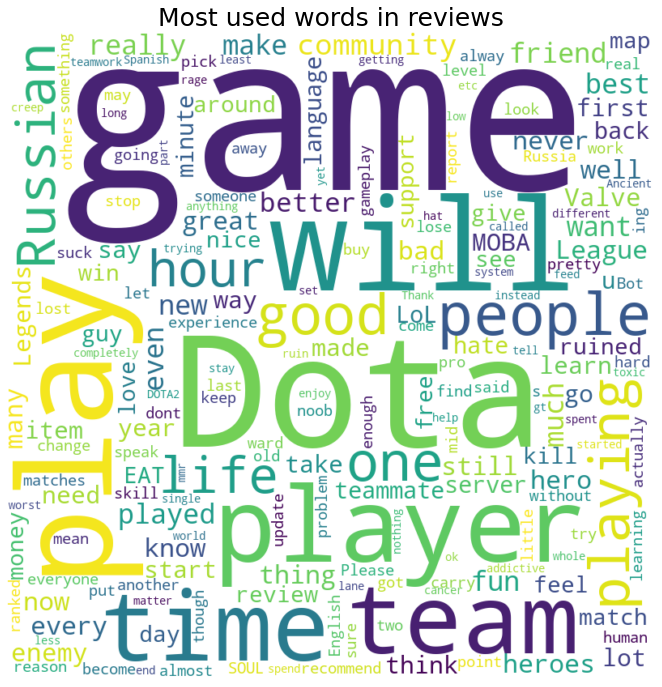

In [19]:
# Most used words in reviews
wordcloud_generator(steam[steam["app_name"]=='Dota 2']["review_text"], title="Most used words in reviews")

In [6]:
steam[["app_name", 'review_score']]

,app_name,review_score
0,Counter-Strike,1
1,Counter-Strike,1
2,Counter-Strike,1
3,Counter-Strike,1
4,Counter-Strike,1
...,...,...
6417101,Puzzle Pirates,-1
6417102,Puzzle Pirates,-1
6417103,Puzzle Pirates,-1
6417104,Puzzle Pirates,-1


In [73]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///{}".format("C:\\Users\\Lenovo IdeaPad JQ\\Dev\\steam-sentiment\\data\\steam-data\\steam.db"))
steam.to_sql('steam', con=engine)

In [83]:
query = """
SELECT * from steam
WHERE app_name=='The Witcher: Enhanced Edition'
""" 

# engine.execute(query).fetchall()
review = pd.read_sql_query(query, con=engine)

In [11]:
steam['review_text'].iloc[3]

"• Do you like original games? • Do you like games that don't lag? • Do you like games you can run on low end PC's? • Do you like games where you don't meet children who have slept with your mother?  Then this is for you!"

In [35]:
from google.cloud import language_v1
from google.oauth2 import service_account

In [39]:
def sample_analyze_sentiment(text_content):
    creds = service_account.Credentials.from_service_account_file(
        'C:\\Users\\Lenovo IdeaPad JQ\\Downloads\\book-club-project-320615-cb8cce0a3613.json'
    )
    client = language_v1.LanguageServiceClient(credentials=creds,)
    
    type_ = language_v1.Document.Type.PLAIN_TEXT
    language = "en"
    document = {"content": text_content, "type_": type_, "language": language}

    encoding_type = language_v1.EncodingType.UTF8

    response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
    print(u"Document sentiment score: {}".format(response.document_sentiment.score))
    print(
        u"Document sentiment magnitude: {}".format(
            response.document_sentiment.magnitude
        )
    )
    # Get sentiment for all sentences in the document
    for sentence in response.sentences:
        print(u"Sentence text: {}".format(sentence.text.content))
        print(u"Sentence sentiment score: {}".format(sentence.sentiment.score))
        print(u"Sentence sentiment magnitude: {}".format(sentence.sentiment.magnitude))

In [40]:
sample_analyze_sentiment('Reminds me of the golden days of gaming. No bs, no gimmick, just simply a good game, awesome!')

Document sentiment score: 0.800000011920929
Document sentiment magnitude: 1.7000000476837158
Sentence text: Reminds me of the golden days of gaming.
Sentence sentiment score: 0.699999988079071
Sentence sentiment magnitude: 0.699999988079071
Sentence text: No bs, no gimmick, just simply a good game, awesome!
Sentence sentiment score: 0.8999999761581421
Sentence sentiment magnitude: 0.8999999761581421


In [41]:
sample_analyze_sentiment('This was awful and bad and totally sucked')

Document sentiment score: -0.800000011920929
Document sentiment magnitude: 0.800000011920929
Sentence text: This was awful and bad and totally sucked
Sentence sentiment score: -0.800000011920929
Sentence sentiment magnitude: 0.800000011920929


In [64]:
steam = steam.groupby('app_name').filter(lambda x : len(x)>50)

In [59]:
steam.to_pickle('steam.pkl')

In [61]:
pd.read_pickle('steam.pkl')

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0


In [66]:
steam

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0
